In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from icedef import metocean

In [4]:
start_time = np.datetime64('2015-04-20T00:00:00')
end_time = np.datetime64('2015-04-21T00:00:00')

In [5]:
meto = metocean.Metocean((start_time, end_time))

In [6]:
lat_bounds = (49, 51)
lon_bounds = (-51, -49)
time_bounds = (start_time, end_time)

ocean_lat_idxs = np.where((meto.ocean.dataset.latitude > lat_bounds[0]) & \
                          (meto.ocean.dataset.latitude < lat_bounds[1]))[0]
ocean_lon_idxs = np.where((meto.ocean.dataset.longitude > lon_bounds[0]) & \
                          (meto.ocean.dataset.longitude < lon_bounds[1]))[0]
ocean_time_idxs = np.where((meto.ocean.dataset.time > time_bounds[0]) & \
                          (meto.ocean.dataset.time < time_bounds[1]))[0]
atm_lat_idxs = np.where((meto.atmosphere.dataset.lat > lat_bounds[0]) & \
                          (meto.atmosphere.dataset.lat < lat_bounds[1]))[0]
atm_lon_idxs = np.where((meto.atmosphere.dataset.lon > lon_bounds[0]) & \
                          (meto.atmosphere.dataset.lon < lon_bounds[1]))[0]
atm_time_idxs = np.where((meto.atmosphere.dataset.time > time_bounds[0]) & \
                          (meto.atmosphere.dataset.time < time_bounds[1]))[0]

uo = meto.ocean.eastward_current_velocities[ocean_time_idxs[0]:ocean_time_idxs[-1], 
                                           ocean_lat_idxs[0]:ocean_lat_idxs[-1],
                                           ocean_lon_idxs[0]:ocean_lon_idxs[-1]]

vo = meto.ocean.northward_current_velocities[ocean_time_idxs[0]:ocean_time_idxs[-1], 
                                           ocean_lat_idxs[0]:ocean_lat_idxs[-1],
                                           ocean_lon_idxs[0]:ocean_lon_idxs[-1]]

wo = np.sqrt(uo**2 + vo**2)

ua = meto.atmosphere.eastward_wind_velocities[atm_time_idxs[0]:atm_time_idxs[-1],
                                             atm_lat_idxs[0]:atm_lat_idxs[-1],
                                             atm_lon_idxs[0]:atm_lon_idxs[-1]]

va = meto.atmosphere.northward_wind_velocities[atm_time_idxs[0]:atm_time_idxs[-1],
                                             atm_lat_idxs[0]:atm_lat_idxs[-1],
                                             atm_lon_idxs[0]:atm_lon_idxs[-1]]

wa = np.sqrt(ua**2 + va**2)

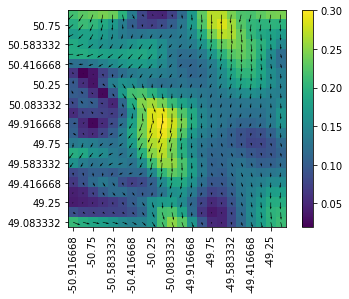

In [7]:
plt.imshow(wo[0,:,:], origin='lower')
plt.xticks(np.arange(0, len(wo.longitude), 2), wo.longitude.values[::2], rotation=90)
plt.yticks(np.arange(0, len(wo.latitude), 2), wo.latitude.values[::2])
plt.colorbar()
plt.quiver(uo[0,:,:], vo[0,:,:])

plt.show()

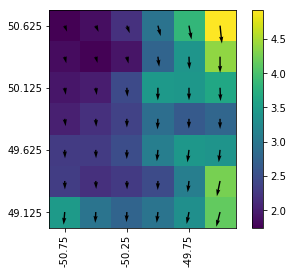

In [8]:
plt.imshow(wa[0,:,:], origin='lower')
plt.xticks(np.arange(0, len(wa.longitude), 2), wa.longitude.values[::2], rotation=90)
plt.yticks(np.arange(0, len(wa.latitude), 2), wa.latitude.values[::2])
plt.colorbar()
plt.quiver(ua[0,:,:], va[0,:,:])

plt.show()

In [30]:
x = np.zeros(len(wa[:,0,0]))
y = np.zeros(len(wa[:,0,0]))
x[0] = 0 #ua.longitude[0]
y[0] = 0 #ua.latitude[0]
for i in range(len(ua.longitude.values) - 1):
    x[i+1] = x[i] + np.mean(np.diff(ua.latitude.values)) / np.mean(np.diff(ua.longitude.values))
    y[i+1] = y[i] + np.mean(np.diff(ua.latitude.values)) / np.mean(np.diff(ua.longitude.values))

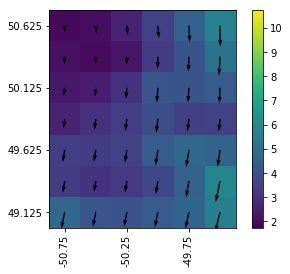

In [54]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'


fig = plt.figure()
im = plt.imshow(wa[0,:,:], origin='lower', animated=True, 
                vmin=min(wa.values.flatten()), vmax=max(wa.values.flatten()))

plt.xticks(np.arange(0, len(wa.longitude), 2), wa.longitude.values[::2], rotation=90)
plt.yticks(np.arange(0, len(wa.latitude), 2), wa.latitude.values[::2])
plt.colorbar()
quiv = plt.quiver(ua[0,:,:], va[0,:,:])
#line = plt.plot(x, y)


i=0

def updatefig(i):
    i += 1
    im.set_array(wa[i,:,:])
    quiv.set_UVC(ua[i,:,:], va[i,:,:])
    #line.set_array(np.array(x[i], y[i]))
    return im, 

anim = animation.FuncAnimation(fig, updatefig, frames=len(wa[:,0,0])-1, interval=500, blit=True)

#HTML(anim.to_html5_video())